In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns

In [3]:
data = pd.read_csv("DATA.csv", sep=";")
data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%y")

days = {'lunes':1, 'martes': 2, 'miércoles': 3, 'jueves': 4, 'viernes': 5, 'sábado': 6, 'domingo': 7}

months = {'enero':1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 
          'junio': 6, 'julio': 7, 'agosto': 8, 'septiembre': 9,
          'octubre': 10, 'noviembre': 11, 'diciembre': 12,
         }

clases = {'CDMR': 0, 'EDMR': 1}

data['Dia'] = data['Dia'].apply(lambda x: days[x])
data['Class'] = data['Class'].apply(lambda x: clases[x])
data['Mes'] = data['Mes'].apply(lambda x: months[x])
data = data.drop(columns=["Date"])
data.head()

,Class,Dia,Semana,Mes,Rentados,Disponibles,Mantenimiento,Totalflota,Reservadas,Canceladas,NoShow,Contratos,Precio
0,1,5,1,1,18,3,3,24,1,0,0,4,50
1,0,5,1,1,14,7,1,25,0,0,0,2,65
2,1,6,1,1,20,1,3,24,1,0,0,3,45
3,0,6,1,1,14,7,1,25,0,0,0,1,50
4,1,7,2,1,17,4,3,24,0,0,0,1,37


In [4]:
# Get X and labels y
X = data.iloc[:,:-1]
y = data['Precio']

In [5]:
#Create a Gaussian Classifier with default parameters
reg = RandomForestRegressor()

#Train the model using the whole dataset and default parameters
reg.fit(X, y)

y_pred = reg.predict(X)

mean_squared_error(y, y_pred), r2_score(y, y_pred)

(18.606605837004405, 0.8912826974349798)

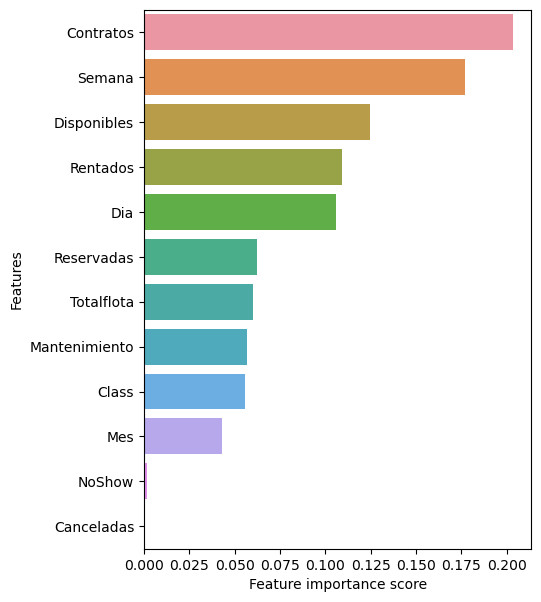

Contratos        0.203460
Semana           0.176833
Disponibles      0.124656
Rentados         0.109277
Dia              0.105997
Reservadas       0.062280
Totalflota       0.060289
Mantenimiento    0.056688
Class            0.055825
Mes              0.043208
NoShow           0.001486
Canceladas       0.000000
dtype: float64

In [64]:
feature_scores = pd.Series(reg.feature_importances_, index=X.columns).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(5, 7))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()
display(feature_scores)

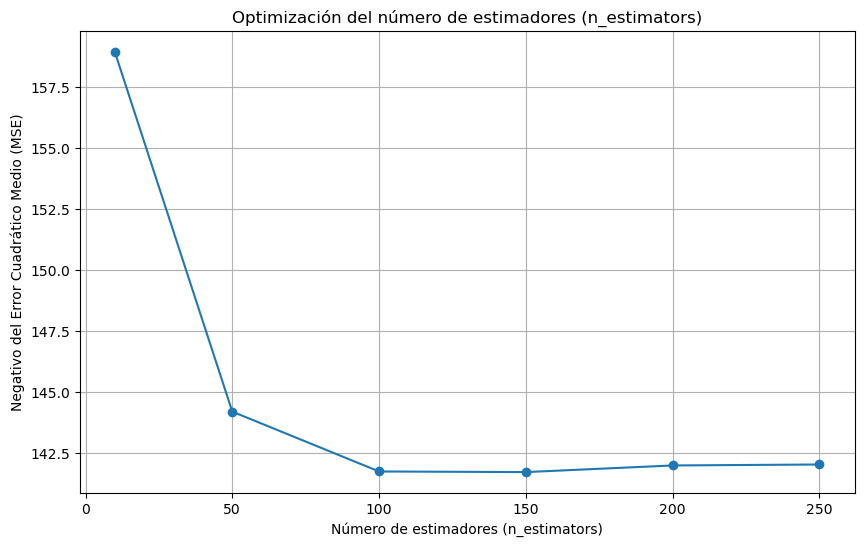

Número óptimo de estimadores (n_estimators): 150


In [13]:

from sklearn.model_selection import cross_val_score
estimator_values = [10, 50, 100, 150, 200, 250]


mse_scores = []


for n_estimators in estimator_values:

    rf_model = RandomForestRegressor(n_estimators=n_estimators)
    

    neg_mse = -np.mean(cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    
  
    mse_scores.append(neg_mse)


optimal_n_estimators = estimator_values[np.argmin(mse_scores)]


plt.figure(figsize=(10, 6))
plt.plot(estimator_values, mse_scores, marker='o', linestyle='-')
plt.title('Optimización del número de estimadores (n_estimators)')
plt.xlabel('Número de estimadores (n_estimators)')
plt.ylabel('Negativo del Error Cuadrático Medio (MSE)')
plt.grid(True)
plt.show()


print(f"Número óptimo de estimadores (n_estimators): {optimal_n_estimators}")

In [25]:
data = pd.read_csv("DATA.csv", sep=";")
data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%y")

days = {'lunes':1, 'martes': 2, 'miércoles': 3, 'jueves': 4, 'viernes': 5, 'sábado': 6, 'domingo': 7}

months = {'enero':1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 
          'junio': 6, 'julio': 7, 'agosto': 8, 'septiembre': 9,
          'octubre': 10, 'noviembre': 11, 'diciembre': 12,
         }

clases = {'CDMR': 0, 'EDMR': 1}

data['Dia'] = data['Dia'].apply(lambda x: days[x])
data['Class'] = data['Class'].apply(lambda x: clases[x])
data['Mes'] = data['Mes'].apply(lambda x: months[x])
data = data.drop(columns=["Date"])
data['Precio'] = data['Precio']

X = data.drop('Precio', axis=1)
y = data['Precio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf_model = RandomForestRegressor(n_estimators=150)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 111.62568571428572
Coeficiente de determinación (R^2): 0.2166419394709802


Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

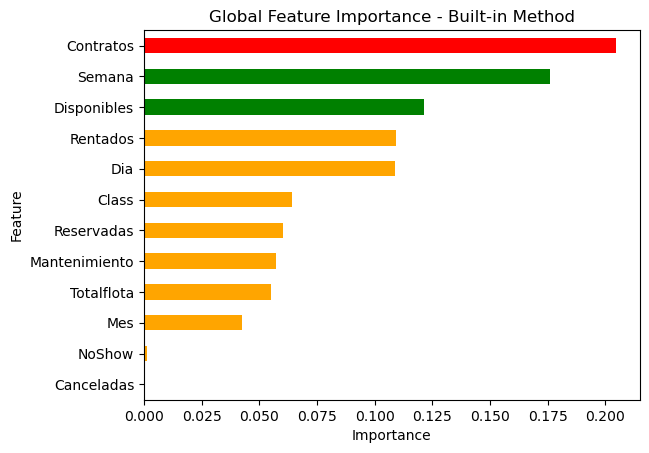

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
colors = ['green' if feature == 'Semana' else
          'green' if feature == 'Disponibles' else
          'orange' if feature == 'Dia' else
          'red' if feature == 'RANDOM' else
          'orange' for feature in global_importances_random.index]

rf = RandomForestRegressor(n_estimators=250)
rf.fit(X_train, y_train)
global_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color=colors)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

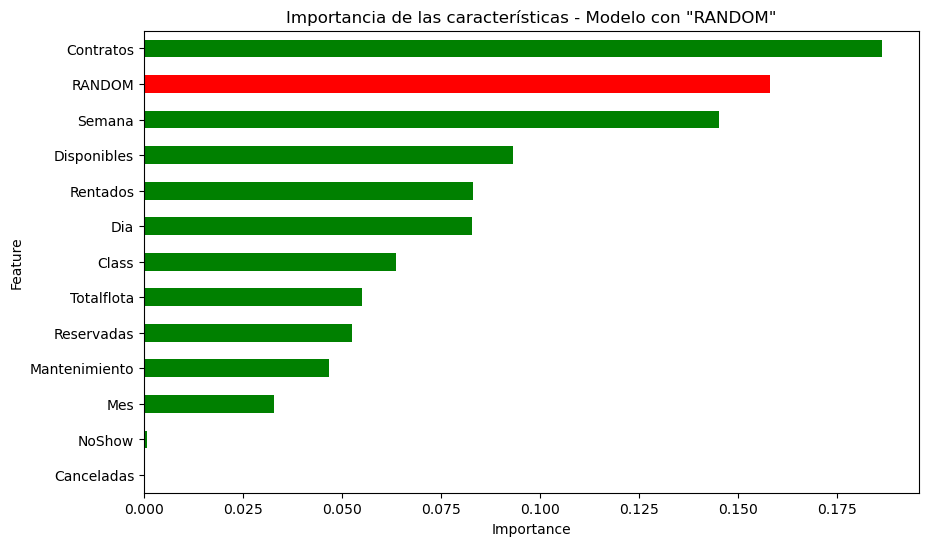

In [30]:
X_train_random = X_train.copy()
X_train_random["RANDOM"] = np.random.RandomState(42).randn(X_train.shape[0])

rf_random = RandomForestRegressor(n_estimators=100, random_state=42)
rf_random.fit(X_train_random, y_train)

global_importances_random = pd.Series(rf_random.feature_importances_, index=X_train_random.columns)
global_importances_random.sort_values(ascending=True, inplace=True)

plt.figure(figsize=(10, 6))
global_importances_random.sort_values(ascending=True, inplace=True)
bars = global_importances_random.plot.barh(color=['green' if feature != 'RANDOM' else 'red' for feature in global_importances_random.index])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Importancia de las características - Modelo con "RANDOM"')


plt.show()

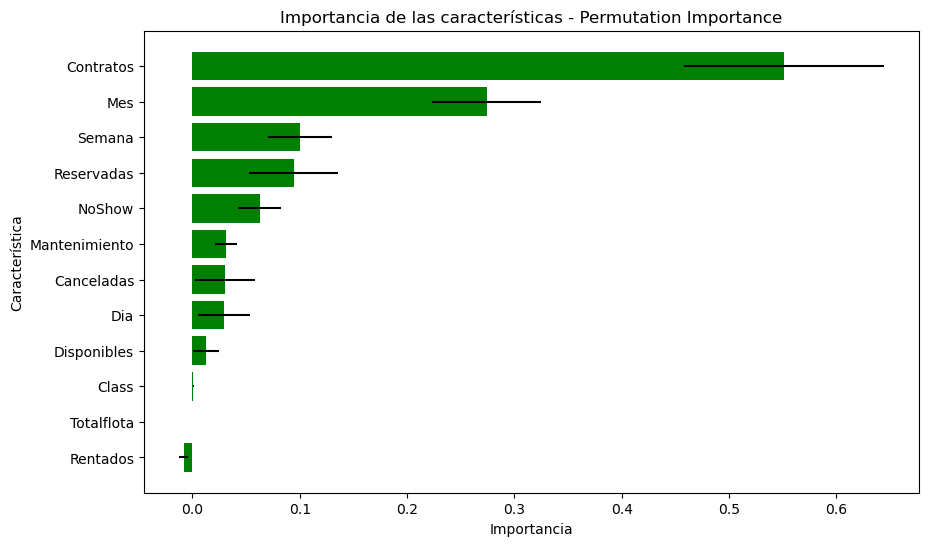

In [36]:
from sklearn.inspection import permutation_importance

rf = RandomForestRegressor(n_estimators=250)
rf.fit(X_train, y_train)

result = permutation_importance(rf, X_test, y_test, n_repeats=10)

perm_importances = result.importances_mean
perm_std = result.importances_std
sorted_idx = perm_importances.argsort()
feature_names = X_test.columns

pd.DataFrame({'Importance': perm_importances, 'Std': perm_std}, index=feature_names[sorted_idx]).sort_values('Importance',ascending=True)


import matplotlib.pyplot as plt


import pandas as pd
from sklearn.inspection import permutation_importance

importance_df = pd.DataFrame({'Importance': perm_importances, 'Std': perm_std}, index=feature_names[sorted_idx]).sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df.index, importance_df['Importance'], xerr=importance_df['Std'], color='green')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características - Permutation Importance')

plt.show()

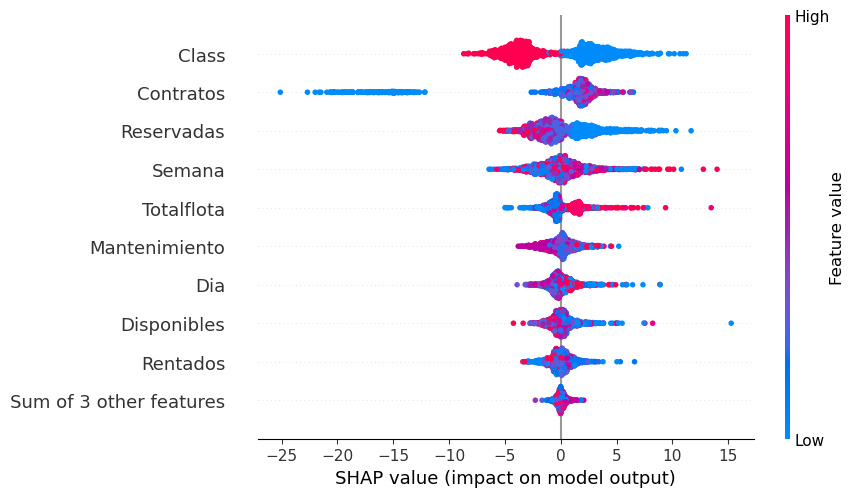

In [37]:
import shap

explainer = shap.Explainer(rf)
shap_values = explainer(X_train)

shap.plots.beeswarm(shap_values)

<Axes: >

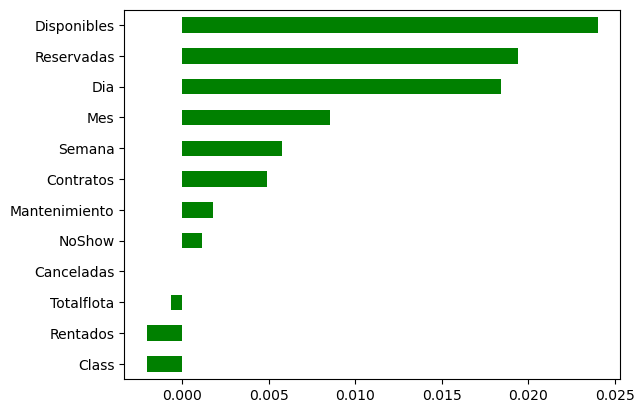

In [42]:
from treeinterpreter import treeinterpreter as ti
mean_contributions = np.mean(contributions, axis=0)
mean_contributions = mean_contributions.astype(float)
pd.Series(mean_contributions, index=X_train.columns).sort_values(ascending=True).plot.barh(color='green')



<Axes: >

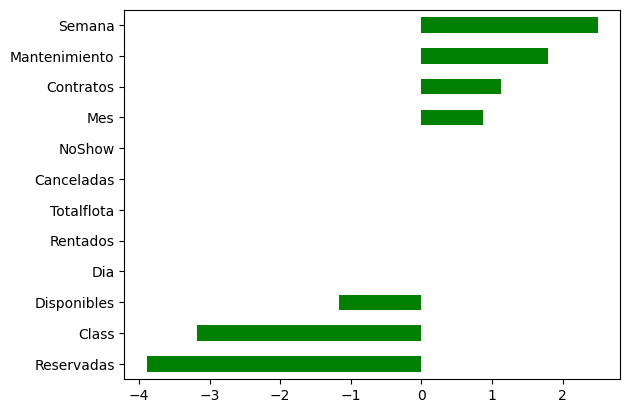

In [53]:
from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from treeinterpreter import treeinterpreter as ti


prediction, bias, contributions = ti.predict(model, X_test)


pd.Series(contributions[0], index=X_test.columns).sort_values(ascending=True).plot.barh(color='green')


<Axes: >

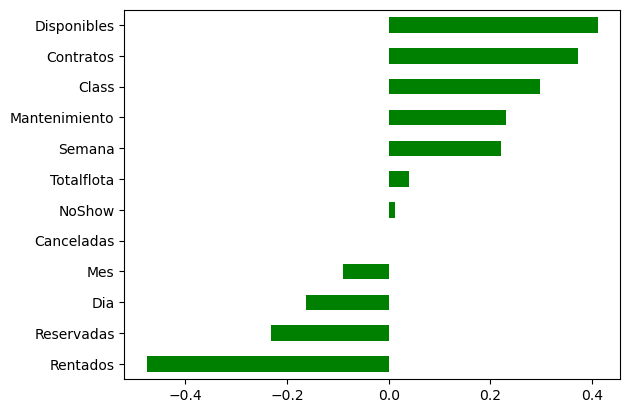

In [60]:
import numpy as np

X_train_random = X_train.copy()
X_train_random["RANDOM"] = np.random.RandomState(42).randn(X_train.shape[0])

rf_random = RandomForestRegressor(n_estimators=100, random_state=42)
rf_random.fit(X_train_random, y_train)

global_importances_random = pd.Series(rf_random.feature_importances_, index=X_train_random.columns)
global_importances_random.sort_values(ascending=True, inplace=True)
importance_df = importance_df.sort_values(by='Importance', ascending=False)
display(importance_df)

,Importance,Std
Contratos,0.551241,0.092867
Mes,0.274031,0.051070
Semana,0.100518,0.029946
Reservadas,0.094161,0.041226
NoShow,0.062489,0.019636
Mantenimiento,0.031177,0.010184
Canceladas,0.030336,0.028193
Dia,0.029445,0.024041
Disponibles,0.012723,0.011841
Class,0.000664,0.000382
